In [1]:
import numpy as np

In [3]:
import torch as tch

In [4]:
arr = [[1,2],[3,4]]
print(arr)

[[1, 2], [3, 4]]


In [5]:
arr = np.array(arr)

In [6]:
print(arr)

[[1 2]
 [3 4]]


In [7]:
print(type(arr))

<class 'numpy.ndarray'>


In [10]:
arr = tch.Tensor(arr)

In [11]:
print(arr)

tensor([[1., 2.],
        [3., 4.]])


In [12]:
print(type(arr))

<class 'torch.Tensor'>


In [13]:
np.ones((2,2))

array([[ 1.,  1.],
       [ 1.,  1.]])

In [15]:
tch.ones((2,2))

tensor([[1., 1.],
        [1., 1.]])

In [16]:
np.random.rand(2,2)

array([[ 0.13404284,  0.27231161],
       [ 0.67589376,  0.8668587 ]])

In [17]:
tch.rand(2,2)

tensor([[0.8822, 0.3393],
        [0.4401, 0.9482]])

In [18]:
if tch.cuda.is_available():
    tch.cuda.manual_seed_all(0)

In [19]:
npArr = np.ones((2,2))

In [20]:
print(npArr)

[[ 1.  1.]
 [ 1.  1.]]


In [21]:
torchTens = tch.from_numpy(npArr)

In [22]:
print(type(torchTens))

<class 'torch.Tensor'>


In [23]:
npArrNew = np.ones((2,2),dtype=np.int32)

In [24]:
tch.from_numpy(npArrNew)

tensor([[1, 1],
        [1, 1]], dtype=torch.int32)

In [25]:
tch.rand(2,2)

tensor([[0.3187, 0.0195],
        [0.5121, 0.9010]])

In [26]:
np.random.rand(2,2)

array([[ 0.49533755,  0.10926332],
       [ 0.63934573,  0.88988893]])

In [27]:
type(tch.rand(2,2))

torch.Tensor

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

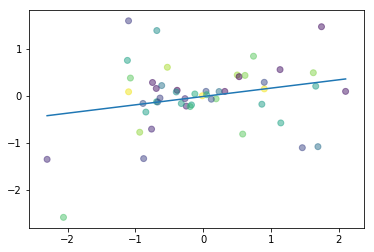

In [31]:
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x*np.random.randn(n)

colors = np.random.rand(n)
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))

plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()

In [32]:
x

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
       -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
       -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
       -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
       -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
       -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
       -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311])

In [33]:
xValues = [i for i in range(11)]

In [34]:
xValues

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [35]:
xTrain = np.array(xValues,dtype=np.float32)
xTrain.shape

(11,)

In [37]:
xTrain.reshape(-1,1)

array([[  0.],
       [  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.]], dtype=float32)

In [38]:
yValues = [2*i + 1 for i in xValues]

In [39]:
yValues

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [42]:
yTrain = np.array(yValues,dtype=np.float32)
yTrain.shape

(11,)

In [43]:
yTrain = yTrain.reshape(-1,1)
yTrain.shape

(11, 1)

In [46]:
#Create Model

In [47]:
import torch
import torch.nn as nn

In [48]:
class LinearRegressionModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        out = self.linear(x)
        return out

In [60]:
yTrain.shape

(11, 1)

In [62]:
xTrain = xTrain.reshape(-1,1)

In [63]:
inputDim = 1
outputDim = 1

model = LinearRegressionModel(inputDim,outputDim)


In [64]:
criterion = nn.MSELoss()

In [65]:
print(type(criterion))

<class 'torch.nn.modules.loss.MSELoss'>


In [66]:
learningRate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr=learningRate)

In [67]:
#Full Process

In [68]:
epochs = 100

In [69]:
for epoch in range(epochs):
    epoch += 1
    #convert numpy array to torch variable
    inputs = torch.from_numpy(xTrain).requires_grad_()
    labels = torch.from_numpy(yTrain)
    
    #Clear gradients w.r.t parameters
    optimizer.zero_grad()
    
    #Forward to get output
    outputs = model(inputs)
    
    #calculate loss
    loss = criterion(outputs,labels)
    
    #Getting gradients w.r.t parameters
    loss.backward()
    
    #updating parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch,loss.item()))

epoch 1, loss 294.1378479003906
epoch 2, loss 23.99276351928711
epoch 3, loss 1.9578791856765747
epoch 4, loss 0.16055309772491455
epoch 5, loss 0.013941261917352676
epoch 6, loss 0.001973038772121072
epoch 7, loss 0.0009875124087557197
epoch 8, loss 0.0008978804689832032
epoch 9, loss 0.0008814670727588236
epoch 10, loss 0.0008710904512554407
epoch 11, loss 0.0008613128447905183
epoch 12, loss 0.0008516958332620561
epoch 13, loss 0.0008421885431744158
epoch 14, loss 0.0008327770628966391
epoch 15, loss 0.0008234696579165757
epoch 16, loss 0.0008142871083691716
epoch 17, loss 0.0008052066550590098
epoch 18, loss 0.0007961964001879096
epoch 19, loss 0.0007873125723563135
epoch 20, loss 0.0007785183843225241
epoch 21, loss 0.0007698291447013617
epoch 22, loss 0.0007612349581904709
epoch 23, loss 0.0007527386187575758
epoch 24, loss 0.0007443188806064427
epoch 25, loss 0.0007360183517448604
epoch 26, loss 0.0007277909317053854
epoch 27, loss 0.0007196639198809862
epoch 28, loss 0.00071162

# Compare Data

In [70]:
predicted = model(torch.from_numpy(xTrain).requires_grad_()).data.numpy()
predicted

array([[  1.03312206],
       [  3.02835226],
       [  5.02358246],
       [  7.01881266],
       [  9.01404285],
       [ 11.00927258],
       [ 13.00450325],
       [ 14.99973392],
       [ 16.9949646 ],
       [ 18.99019241],
       [ 20.98542404]], dtype=float32)

In [71]:
yTrain

array([[  1.],
       [  3.],
       [  5.],
       [  7.],
       [  9.],
       [ 11.],
       [ 13.],
       [ 15.],
       [ 17.],
       [ 19.],
       [ 21.]], dtype=float32)

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [3]:
trainDataset = datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)

Processing...
Done!


In [6]:
len(trainDataset)

60000

In [7]:
trainDataset[8]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [1,2,3,4,5,6,7,8,9,10]
y = [0,0,0,0,0,1,1,1,1,1]

colors = np.random.randn(len(x)) 

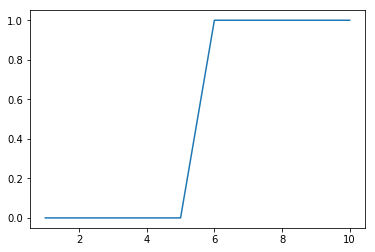

In [4]:
plt.plot(x,y)

poly1d([ 0.15151515, -0.33333333])

In [1]:
import os

In [2]:
import cv2

ModuleNotFoundError: No module named 'cv2'